In [7]:
from env_utils import get_lhs_env, get_6wt_env, get_4wt_symmetric_env
from stable_baselines3 import PPO
from wandb.integration.sb3 import WandbCallback
from stable_baselines3.common.callbacks import CallbackList, BaseCallback

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import wandb

EVAL_REPS = 10
EPISODE_LEN = 100
TRAINING_STEPS = 1e6
RUNS = TRAINING_STEPS / EPISODE_LEN

degree_step = 5
evaluations = 360 // degree_step

print(f"Will do {RUNS} runs")

def get_experiment_name(agent, env, privileged, mast_distancing, changing_wind, training_steps):
    name = f"{agent}_{env}"
    if privileged:
        name += "_privileged" + f"_md{mast_distancing}"
    else:
        name += "_unprivileged"
    name = name + "_cw" if changing_wind else name
    name += f"_t{training_steps}"
    return name

Will do 10000.0 runs


In [2]:
# Train unprivileged PPO on 4wt symmetric
print(f"Training 4wt symmetric for {TRAINING_STEPS} steps, unprivileged, episode length {EPISODE_LEN}")
env = get_4wt_symmetric_env(episode_length=EPISODE_LEN, privileged=False)
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=TRAINING_STEPS)
print("Training done")
model.save(f"ppo_4wt_symmetric_unprivileged_t{TRAINING_STEPS}")

Training 4wt symmetric for 1000000.0 steps, unprivileged, episode length 100
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Run count: 1
Wind speed: 3.6647796212543353
Wind direction: 108


/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:209: RuntimeWarning: invalid value encountered in sqrt
  ln_deltaNum = (1.6 + np.sqrt(M0)) * (
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:210: RuntimeWarning: invalid value encountered in sqrt
  1.6 * np.sqrt(sigma_y * sigma_z / (sigma_y0 * sigma_z0)) - np.sqrt(M0)
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:212: RuntimeWarning: invalid value encountered in sqrt
  ln_deltaDen = (1.6 - np.sqrt(M0)) * (
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:213: RuntimeWarning: invalid value encountered in sqrt
  1.6 * np.sqrt(sigma_y * sigma_z / (sigma_y0 * sigma_z0)) + np.sqrt(M0)
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gauss

Run count: 2
Wind speed: 9.39752790954
Wind direction: 203


/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gaussian_model_base.py:516: RuntimeWarning: divide by zero encountered in divide
  uR = U_local * Ct / (2.0 * (1 - np.sqrt(1 - Ct)))
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gauss_legacy.py:175: RuntimeWarning: invalid value encountered in multiply
  ) + ((x_locations - xR) / (x0 - xR)) * sigma_y0
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gauss_legacy.py:178: RuntimeWarning: invalid value encountered in multiply
  ) + ((x_locations - xR) / (x0 - xR)) * sigma_z0


Run count: 3
Wind speed: 0.8466539984201576
Wind direction: 153
Run count: 4
Wind speed: 18.69623452620767
Wind direction: 267


/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:220: RuntimeWarning: invalid value encountered in log
  * np.log(ln_deltaNum / ln_deltaDen)


Run count: 5
Wind speed: 3.37941448452401
Wind direction: 253
Run count: 6
Wind speed: 21.27883303251409
Wind direction: 349
Run count: 7
Wind speed: 1.8560248760160576
Wind direction: 166
Run count: 8
Wind speed: 6.468132421135294
Wind direction: 277
Run count: 9
Wind speed: 22.799666897237536
Wind direction: 110
Run count: 10
Wind speed: 14.585951414157137
Wind direction: 32
Run count: 11
Wind speed: 12.586563562623443
Wind direction: 250
Run count: 12
Wind speed: 21.50116092915716
Wind direction: 40
Run count: 13
Wind speed: 9.068624339783838
Wind direction: 208
Run count: 14
Wind speed: 6.2694743375195205
Wind direction: 41
Run count: 15
Wind speed: 18.13319752488797
Wind direction: 75
Run count: 16
Wind speed: 12.340214801834792
Wind direction: 309
Run count: 17
Wind speed: 18.771102621900226
Wind direction: 128
Run count: 18
Wind speed: 12.132655927991772
Wind direction: 254
Run count: 19
Wind speed: 14.142947071793868
Wind direction: 51
Run count: 20
Wind speed: 18.5307977536004

KeyboardInterrupt: 

# Changing wind unprivileged PPO 4wt

In [3]:
# Training unprivileged PPO on 4wt symmetric with changing wind
experiment_name = "ppo_4wt_symmetric_unprivileged_changing_wind"
agent = "ppo"
env = "4wt_symmetric"
privileged = False
changing_wind = True

config = {
    "experiment_name": experiment_name,
    "agent": agent,
    "env": env,
    "privileged": privileged,
    "changing_wind": changing_wind,
}
run = wandb.init(
    project="thesis_tests",
    config=config,
    sync_tensorboard=True,  # auto-upload sb3's tensorboard metrics
    monitor_gym=True,  # auto-upload the videos of agents playing the game
    save_code=False,  # optional
    name=experiment_name,
)
callback = WandbCallback(
    gradient_save_freq=100,
    model_save_path=f"models/{run.id}",
    verbose=2,
)

print(f"Training 4wt symmetric for {TRAINING_STEPS} steps, unprivileged, episode length {EPISODE_LEN}, changing wind")
env = get_4wt_symmetric_env(episode_length=EPISODE_LEN, privileged=False, changing_wind=True)
model = PPO("MlpPolicy", env, verbose=1, tensorboard_log=f"runs/{run.id}")
model.learn(total_timesteps=TRAINING_STEPS, callback=callback)
print("Training done")
model.save(f"ppo_4wt_symmetric_unprivileged_changing_wind_t{TRAINING_STEPS}")

run.finish()

Training 4wt symmetric for 1000000.0 steps, unprivileged, episode length 100, changing wind
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Run count: 1
Wind speed: 15.05480248396527
Wind direction: 25
Logging to runs/r7vi5yz8/PPO_1


/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:209: RuntimeWarning: invalid value encountered in sqrt
  ln_deltaNum = (1.6 + np.sqrt(M0)) * (
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:210: RuntimeWarning: invalid value encountered in sqrt
  1.6 * np.sqrt(sigma_y * sigma_z / (sigma_y0 * sigma_z0)) - np.sqrt(M0)
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:212: RuntimeWarning: invalid value encountered in sqrt
  ln_deltaDen = (1.6 - np.sqrt(M0)) * (
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:213: RuntimeWarning: invalid value encountered in sqrt
  1.6 * np.sqrt(sigma_y * sigma_z / (sigma_y0 * sigma_z0)) + np.sqrt(M0)
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:219: Runt

Run count: 2
Wind speed: 24.917851083207385
Wind direction: 299
Run count: 3
Wind speed: 17.67770722702314
Wind direction: 101
Run count: 4
Wind speed: 1.5645571068012254
Wind direction: 179
Run count: 5
Wind speed: 9.97503713276933
Wind direction: 327
Run count: 6
Wind speed: 6.208891576383986
Wind direction: 331


/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:181: RuntimeWarning: invalid value encountered in sqrt
  sigma_z0 = D * 0.5 * np.sqrt(uR / (U_local + u0))


Run count: 7
Wind speed: 4.776326142316962
Wind direction: 309
Run count: 8
Wind speed: 3.6782831747447315
Wind direction: 247
Run count: 9
Wind speed: 13.709894045287044
Wind direction: 1
Run count: 10
Wind speed: 11.083420126848688
Wind direction: 353
Run count: 11
Wind speed: 14.680774014178517
Wind direction: 292
Run count: 12
Wind speed: 21.759621448995457
Wind direction: 152
Run count: 13
Wind speed: 8.22336361166332
Wind direction: 208
Run count: 14
Wind speed: 5.847050155267337
Wind direction: 191
Run count: 15
Wind speed: 4.147410289749056
Wind direction: 258
Run count: 16
Wind speed: 11.665622936466393
Wind direction: 34
Run count: 17
Wind speed: 3.9641643419380506
Wind direction: 205
Run count: 18
Wind speed: 0.6584971454220632
Wind direction: 114
Run count: 19
Wind speed: 4.557802392692558
Wind direction: 60
Run count: 20
Wind speed: 16.830272327545092
Wind direction: 279


/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gauss_legacy.py:173: RuntimeWarning: divide by zero encountered in divide
  sigma_y = (((x0 - xR) - (x_locations - xR)) / (x0 - xR)) * 0.501 * D * np.sqrt(
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gauss_legacy.py:175: RuntimeWarning: divide by zero encountered in divide
  ) + ((x_locations - xR) / (x0 - xR)) * sigma_y0
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gauss_legacy.py:176: RuntimeWarning: divide by zero encountered in divide
  sigma_z = (((x0 - xR) - (x_locations - xR)) / (x0 - xR)) * 0.501 * D * np.sqrt(
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gauss_legacy.py:178: RuntimeWarning: divide by zero encountered in divide
  ) + ((x_locations - xR) / (x0 - xR))

Run count: 21
Wind speed: 15.67844679905407
Wind direction: 342
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | 0.137    |
| time/              |          |
|    fps             | 25       |
|    iterations      | 1        |
|    time_elapsed    | 79       |
|    total_timesteps | 2048     |
---------------------------------
Run count: 22
Wind speed: 9.727759573990596
Wind direction: 57
Run count: 23
Wind speed: 9.261768973665088
Wind direction: 207
Run count: 24
Wind speed: 15.09593839700338
Wind direction: 65
Run count: 25
Wind speed: 4.472454438195189
Wind direction: 142
Run count: 26
Wind speed: 12.712485857219566
Wind direction: 64
Run count: 27
Wind speed: 12.962592425369785
Wind direction: 350
Run count: 28
Wind speed: 14.557944582417456
Wind direction: 190
Run count: 29
Wind speed: 19.845984614730394
Wind direction: 57
Run count: 30
Wind speed: 6.3656077414645615
Wind direction: 349
Run count: 31
Wind 

/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gauss_legacy.py:173: RuntimeWarning: invalid value encountered in add
  sigma_y = (((x0 - xR) - (x_locations - xR)) / (x0 - xR)) * 0.501 * D * np.sqrt(
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gauss_legacy.py:176: RuntimeWarning: invalid value encountered in add
  sigma_z = (((x0 - xR) - (x_locations - xR)) / (x0 - xR)) * 0.501 * D * np.sqrt(


Run count: 125
Wind speed: 21.559476665496582
Wind direction: 335
Run count: 126
Wind speed: 21.113380501782096
Wind direction: 66
Run count: 127
Wind speed: 14.885236016288344
Wind direction: 139
Run count: 128
Wind speed: 9.909041760188238
Wind direction: 245
Run count: 129
Wind speed: 9.257185783136487
Wind direction: 227
Run count: 130
Wind speed: 5.560133759629285
Wind direction: 295
Run count: 131
Wind speed: 1.1799580193999581
Wind direction: 193
Run count: 132
Wind speed: 4.1337945160265805
Wind direction: 249
Run count: 133
Wind speed: 9.441412501235657
Wind direction: 254
Run count: 134
Wind speed: 2.3942401280771817
Wind direction: 81
Run count: 135
Wind speed: 10.532953740392124
Wind direction: 173
Run count: 136
Wind speed: 22.368853260328944
Wind direction: 89
Run count: 137
Wind speed: 3.5725534735211317
Wind direction: 76
Run count: 138
Wind speed: 10.490973655453292
Wind direction: 341
Run count: 139
Wind speed: 1.6706618860951143
Wind direction: 260
Run count: 140
Win

# Changing wind privileged PPO

In [8]:
# Training unprivileged PPO on 4wt symmetric with changing wind
#experiment_name = "ppo_4wt_symmetric_privileged_md75_changing_wind"
agent = "ppo"
env = "4wt_symmetric"
privileged = True
changing_wind = True
mast_distancing = 75
experiment_name = get_experiment_name(agent, env, privileged, mast_distancing, changing_wind, TRAINING_STEPS)

config = {
    "experiment_name": experiment_name,
    "agent": agent,
    "env": env,
    "privileged": privileged,
    "changing_wind": changing_wind,
    "mast_distancing": mast_distancing,
}
run = wandb.init(
    project="thesis_tests",
    config=config,
    sync_tensorboard=True,  # auto-upload sb3's tensorboard metrics
    monitor_gym=True,  # auto-upload the videos of agents playing the game
    save_code=False,  # optional
    name=experiment_name,
)
wandb_callback = WandbCallback(
    gradient_save_freq=100,
    model_save_path=f"models/{run.id}",
    verbose=2,
)
callback = CallbackList([wandb_callback])

print(f"Training 4wt symmetric for {TRAINING_STEPS} steps, privileged, episode length {EPISODE_LEN}, changing wind")
env = get_4wt_symmetric_env(episode_length=EPISODE_LEN, privileged=privileged, changing_wind=changing_wind, mast_distancing=mast_distancing)
model = PPO("MlpPolicy", env, verbose=1, tensorboard_log=f"runs/{run.id}")
model.learn(total_timesteps=TRAINING_STEPS, callback=callback)
print("Training done")
model.save(f"{experiment_name}_t{TRAINING_STEPS}")

run.finish()

wandb: WARNING When using several event log directories, please call `wandb.tensorboard.patch(root_logdir="...")` before `wandb.init`


Training 4wt symmetric for 1000000.0 steps, privileged, episode length 100, changing wind
Making env with n masts: 9
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Run count: 1
Wind speed: 6.386912651087876
Wind direction: 224
Logging to runs/msivztnc/PPO_1
Run count: 2
Wind speed: 17.982984850132624
Wind direction: 267


/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:209: RuntimeWarning: invalid value encountered in sqrt
  ln_deltaNum = (1.6 + np.sqrt(M0)) * (
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:210: RuntimeWarning: invalid value encountered in sqrt
  1.6 * np.sqrt(sigma_y * sigma_z / (sigma_y0 * sigma_z0)) - np.sqrt(M0)
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:212: RuntimeWarning: invalid value encountered in sqrt
  ln_deltaDen = (1.6 - np.sqrt(M0)) * (
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:213: RuntimeWarning: invalid value encountered in sqrt
  1.6 * np.sqrt(sigma_y * sigma_z / (sigma_y0 * sigma_z0)) + np.sqrt(M0)
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:219: Runt

Run count: 3
Wind speed: 17.568341859291007
Wind direction: 146
Run count: 4
Wind speed: 25.0
Wind direction: 140
Run count: 5
Wind speed: 23.145852044862146
Wind direction: 317


/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gauss_legacy.py:173: RuntimeWarning: invalid value encountered in sqrt
  sigma_y = (((x0 - xR) - (x_locations - xR)) / (x0 - xR)) * 0.501 * D * np.sqrt(
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gauss_legacy.py:176: RuntimeWarning: invalid value encountered in sqrt
  sigma_z = (((x0 - xR) - (x_locations - xR)) / (x0 - xR)) * 0.501 * D * np.sqrt(
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_turbulence/crespo_hernandez.py:93: RuntimeWarning: invalid value encountered in scalar power
  * turbine.aI ** self.ti_ai
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/numpy

Run count: 6
Wind speed: 8.802096652335765
Wind direction: 18
Run count: 7
Wind speed: 20.282693939261232
Wind direction: 105
Run count: 8
Wind speed: 1.7879875458527155
Wind direction: 54
Run count: 9
Wind speed: 23.02699458585018
Wind direction: 207
Run count: 10
Wind speed: 21.04947256874525
Wind direction: 211
Run count: 11
Wind speed: 10.169775855740617
Wind direction: 161
Run count: 12
Wind speed: 24.093323712341306
Wind direction: 187
Run count: 13
Wind speed: 0.295776799786168
Wind direction: 239
Run count: 14
Wind speed: 10.091088066079106
Wind direction: 229
Run count: 15
Wind speed: 18.69318105401049
Wind direction: 255
Run count: 16
Wind speed: 3.0992510066226924
Wind direction: 154
Run count: 17
Wind speed: 0.8573709066543158
Wind direction: 106
Run count: 18
Wind speed: 3.005177253056929
Wind direction: 309
Run count: 19
Wind speed: 7.9264838900250405
Wind direction: 151
Run count: 20
Wind speed: 11.734077617258404
Wind direction: 316
Run count: 21
Wind speed: 7.998782879

/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gauss_legacy.py:173: RuntimeWarning: invalid value encountered in add
  sigma_y = (((x0 - xR) - (x_locations - xR)) / (x0 - xR)) * 0.501 * D * np.sqrt(
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gauss_legacy.py:176: RuntimeWarning: invalid value encountered in add
  sigma_z = (((x0 - xR) - (x_locations - xR)) / (x0 - xR)) * 0.501 * D * np.sqrt(


Run count: 88
Wind speed: 19.530905678315413
Wind direction: 56
Run count: 89
Wind speed: 22.568931736579003
Wind direction: 213
Run count: 90
Wind speed: 2.7543658926617116
Wind direction: 166
Run count: 91
Wind speed: 6.198330914160499
Wind direction: 272
Run count: 92
Wind speed: 11.2344522258459
Wind direction: 316
Run count: 93
Wind speed: 7.690650825210732
Wind direction: 126
Run count: 94
Wind speed: 23.799179021696148
Wind direction: 8
Run count: 95
Wind speed: 7.500898572514419
Wind direction: 274
Run count: 96
Wind speed: 13.597252593867545
Wind direction: 246
Run count: 97
Wind speed: 8.987805204274437
Wind direction: 45
Run count: 98
Wind speed: 22.69353458963802
Wind direction: 97
Run count: 99
Wind speed: 8.787530862094643
Wind direction: 191
Run count: 100
Wind speed: 17.644662720626165
Wind direction: 167
Run count: 101
Wind speed: 5.798027162263381
Wind direction: 249
Run count: 102
Wind speed: 19.34908614589161
Wind direction: 29
Run count: 103
Wind speed: 1.701885764

In [3]:
# Train privileged PPO on 4wt symmetric
env = get_4wt_symmetric_env(episode_length=EPISODE_LEN)
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=TRAINING_STEPS)
print("Training done")
model.save(f"ppo_4wt_symmetric_privileged_t{TRAINING_STEPS}")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Run count: 1
Wind speed: 4.597541388139115
Wind direction: 333
Run count: 2
Wind speed: 7.090606853793446
Wind direction: 25
Run count: 3
Wind speed: 19.851608138488768
Wind direction: 168
Run count: 4
Wind speed: 23.792098882197763
Wind direction: 147
Run count: 5
Wind speed: 14.516668252373297
Wind direction: 178
Run count: 6
Wind speed: 3.8720111423735633
Wind direction: 221
Run count: 7
Wind speed: 7.8482749735143935
Wind direction: 356
Run count: 8
Wind speed: 0.31715014592192114
Wind direction: 191
Run count: 9
Wind speed: 11.540868564358611
Wind direction: 246
Run count: 10
Wind speed: 7.5699638995442
Wind direction: 103
Run count: 11
Wind speed: 5.7902186957496244
Wind direction: 351
Run count: 12
Wind speed: 17.47795620906683
Wind direction: 264
Run count: 13
Wind speed: 10.906667811095938
Wind direction: 124
Run count: 14
Wind speed: 5.024622250238661
Wind direction: 205
Run count: 

/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gauss_legacy.py:173: RuntimeWarning: divide by zero encountered in divide
  sigma_y = (((x0 - xR) - (x_locations - xR)) / (x0 - xR)) * 0.501 * D * np.sqrt(
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gauss_legacy.py:175: RuntimeWarning: divide by zero encountered in divide
  ) + ((x_locations - xR) / (x0 - xR)) * sigma_y0
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gauss_legacy.py:173: RuntimeWarning: invalid value encountered in add
  sigma_y = (((x0 - xR) - (x_locations - xR)) / (x0 - xR)) * 0.501 * D * np.sqrt(
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gauss_legacy.py:176: RuntimeWarning: divide by zero encountered in divide
  sigma_z = (((x0 - xR) - (x_locations - x

Run count: 16
Wind speed: 10.019393382771154
Wind direction: 94
Run count: 17
Wind speed: 18.436551191285325
Wind direction: 311
Run count: 18
Wind speed: 21.99564719058363
Wind direction: 58
Run count: 19
Wind speed: 14.243230373219406
Wind direction: 245
Run count: 20
Wind speed: 7.526764049450457
Wind direction: 51
Run count: 21
Wind speed: 1.6259901941207051
Wind direction: 145
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | 0.158    |
| time/              |          |
|    fps             | 8        |
|    iterations      | 1        |
|    time_elapsed    | 228      |
|    total_timesteps | 2048     |
---------------------------------
Run count: 22
Wind speed: 23.705265754415635
Wind direction: 85
Run count: 23
Wind speed: 1.779502177062986
Wind direction: 307
Run count: 24
Wind speed: 19.54239959866578
Wind direction: 351
Run count: 25
Wind speed: 4.769200818425959
Wind direction: 301
Run count: 26
Wind 

In [8]:
# Privileged PPO 4wt symmetric training
# Different mast density
env = get_4wt_symmetric_env(episode_length=EPISODE_LEN, mast_distancing=75)
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=TRAINING_STEPS)
print("Training done")
model.save(f"ppo_4wt_symmetric_privileged_t{TRAINING_STEPS}_mast75")

Making env with n masts: 9
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Run count: 1
Wind speed: 16.2106443982941
Wind direction: 146


/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:219: RuntimeWarning: invalid value encountered in sqrt
  * np.sqrt(sigma_y0 * sigma_z0 / (ky * kz * M0))
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:220: RuntimeWarning: invalid value encountered in log
  * np.log(ln_deltaNum / ln_deltaDen)
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:156: RuntimeWarning: divide by zero encountered in divide
  U_local
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:181: RuntimeWarning: invalid value encountered in sqrt
  sigma_z0 = D * 0.5 * np.sqrt(uR / (U_local + u0))
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gaussian_model_base.py:516: RuntimeWarning: divide by zero encountered in divid

Run count: 2
Wind speed: 3.8747930081423103
Wind direction: 85
Run count: 3
Wind speed: 5.265437578268095
Wind direction: 17
Run count: 4
Wind speed: 11.882281544575946
Wind direction: 126
Run count: 5
Wind speed: 22.397415832758487
Wind direction: 179
Run count: 6
Wind speed: 2.6102728686521663
Wind direction: 5
Run count: 7
Wind speed: 3.303564012728602
Wind direction: 226
Run count: 8
Wind speed: 12.28730312247111
Wind direction: 195
Run count: 9
Wind speed: 17.816655150985238
Wind direction: 190
Run count: 10
Wind speed: 9.729704070925385
Wind direction: 159
Run count: 11
Wind speed: 9.742339870645992
Wind direction: 350
Run count: 12
Wind speed: 17.409572036630404
Wind direction: 0
Run count: 13
Wind speed: 23.622527324246214
Wind direction: 313
Run count: 14
Wind speed: 10.819627522815411
Wind direction: 217
Run count: 15
Wind speed: 21.366150137864203
Wind direction: 250
Run count: 16
Wind speed: 8.045100312418265
Wind direction: 178
Run count: 17
Wind speed: 4.4976962546953825


/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gauss_legacy.py:173: RuntimeWarning: divide by zero encountered in divide
  sigma_y = (((x0 - xR) - (x_locations - xR)) / (x0 - xR)) * 0.501 * D * np.sqrt(
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gauss_legacy.py:175: RuntimeWarning: divide by zero encountered in divide
  ) + ((x_locations - xR) / (x0 - xR)) * sigma_y0
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gauss_legacy.py:173: RuntimeWarning: invalid value encountered in add
  sigma_y = (((x0 - xR) - (x_locations - xR)) / (x0 - xR)) * 0.501 * D * np.sqrt(
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gauss_legacy.py:176: RuntimeWarning: divide by zero encountered in divide
  sigma_z = (((x0 - xR) - (x_locations - x

Run count: 44
Wind speed: 13.918725604983909
Wind direction: 196
Run count: 45
Wind speed: 21.348528276214807
Wind direction: 216
Run count: 46
Wind speed: 24.82808284280947
Wind direction: 294
Run count: 47
Wind speed: 15.297648596644231
Wind direction: 109
Run count: 48
Wind speed: 17.874642635208048
Wind direction: 234
Run count: 49
Wind speed: 16.597441019339453
Wind direction: 53
Run count: 50
Wind speed: 2.2274439674276225
Wind direction: 70
Run count: 51
Wind speed: 13.325456822507523
Wind direction: 255
Run count: 52
Wind speed: 13.301221260863302
Wind direction: 160
Run count: 53
Wind speed: 10.532089436113454
Wind direction: 182
Run count: 54
Wind speed: 13.501136218215077
Wind direction: 206
Run count: 55
Wind speed: 13.207243067945335
Wind direction: 342
Run count: 56
Wind speed: 22.117000280987813
Wind direction: 75
Run count: 57
Wind speed: 16.10940537069813
Wind direction: 260
Run count: 58
Wind speed: 7.791772291738197
Wind direction: 314
Run count: 59
Wind speed: 24.14

In [9]:
# Mast distancing 100
env = get_4wt_symmetric_env(episode_length=EPISODE_LEN, mast_distancing=100)
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=TRAINING_STEPS)
print("Training done")
model.save(f"ppo_4wt_symmetric_privileged_t{TRAINING_STEPS}_mast100")

Making env with n masts: 4
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Run count: 1
Wind speed: 17.900823619422113
Wind direction: 359


/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:156: RuntimeWarning: divide by zero encountered in divide
  U_local
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:209: RuntimeWarning: invalid value encountered in sqrt
  ln_deltaNum = (1.6 + np.sqrt(M0)) * (
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:210: RuntimeWarning: invalid value encountered in divide
  1.6 * np.sqrt(sigma_y * sigma_z / (sigma_y0 * sigma_z0)) - np.sqrt(M0)
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:210: RuntimeWarning: invalid value encountered in sqrt
  1.6 * np.sqrt(sigma_y * sigma_z / (sigma_y0 * sigma_z0)) - np.sqrt(M0)
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:212: RuntimeWarning: invalid value

Run count: 2
Wind speed: 8.699408283587232
Wind direction: 127


/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gauss_legacy.py:173: RuntimeWarning: invalid value encountered in sqrt
  sigma_y = (((x0 - xR) - (x_locations - xR)) / (x0 - xR)) * 0.501 * D * np.sqrt(
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gauss_legacy.py:176: RuntimeWarning: invalid value encountered in sqrt
  sigma_z = (((x0 - xR) - (x_locations - xR)) / (x0 - xR)) * 0.501 * D * np.sqrt(
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_turbulence/crespo_hernandez.py:93: RuntimeWarning: invalid value encountered in scalar power
  * turbine.aI ** self.ti_ai
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/turbine.py:692: RuntimeWarning: invalid value encountered in scalar power
  yaw_effective_velocity = self.average_velocity * cosd(self.yaw_angle) ** pW


Run count: 3
Wind speed: 19.671467031783983
Wind direction: 271


/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:220: RuntimeWarning: invalid value encountered in log
  * np.log(ln_deltaNum / ln_deltaDen)


Run count: 4
Wind speed: 17.502498555452544
Wind direction: 276
Run count: 5
Wind speed: 24.348700274231557
Wind direction: 161
Run count: 6
Wind speed: 18.255548816656084
Wind direction: 212
Run count: 7
Wind speed: 11.399164275733186
Wind direction: 271
Run count: 8
Wind speed: 8.360734657584402
Wind direction: 155
Run count: 9
Wind speed: 17.8372733593703
Wind direction: 57
Run count: 10
Wind speed: 12.19331201926692
Wind direction: 321
Run count: 11
Wind speed: 0.2527535223395466
Wind direction: 334
Run count: 12
Wind speed: 22.191671124673242
Wind direction: 326
Run count: 13
Wind speed: 19.07247563157091
Wind direction: 100
Run count: 14
Wind speed: 6.891721715616334
Wind direction: 251
Run count: 15
Wind speed: 22.93945869222854
Wind direction: 166
Run count: 16
Wind speed: 6.303364329655187
Wind direction: 73
Run count: 17
Wind speed: 15.250155791935455
Wind direction: 158
Run count: 18
Wind speed: 5.297293235080244
Wind direction: 4
Run count: 19
Wind speed: 8.018988954152494


/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gauss_legacy.py:173: RuntimeWarning: divide by zero encountered in divide
  sigma_y = (((x0 - xR) - (x_locations - xR)) / (x0 - xR)) * 0.501 * D * np.sqrt(
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gauss_legacy.py:175: RuntimeWarning: divide by zero encountered in divide
  ) + ((x_locations - xR) / (x0 - xR)) * sigma_y0
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gauss_legacy.py:173: RuntimeWarning: invalid value encountered in add
  sigma_y = (((x0 - xR) - (x_locations - xR)) / (x0 - xR)) * 0.501 * D * np.sqrt(
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_velocity/gaussianModels/gauss_legacy.py:176: RuntimeWarning: divide by zero encountered in divide
  sigma_z = (((x0 - xR) - (x_locations - x

Run count: 188
Wind speed: 8.723094874577653
Wind direction: 151
Run count: 189
Wind speed: 9.246186990784627
Wind direction: 250
Run count: 190
Wind speed: 5.122782981880644
Wind direction: 140
Run count: 191
Wind speed: 13.144899971599374
Wind direction: 212
Run count: 192
Wind speed: 13.561441715836139
Wind direction: 136
Run count: 193
Wind speed: 10.633511232197575
Wind direction: 218
Run count: 194
Wind speed: 3.896016686136522
Wind direction: 134
Run count: 195
Wind speed: 7.138950191285046
Wind direction: 207
Run count: 196
Wind speed: 4.488660857452917
Wind direction: 347
Run count: 197
Wind speed: 1.709094101331804
Wind direction: 342
Run count: 198
Wind speed: 19.1772386156076
Wind direction: 231
Run count: 199
Wind speed: 14.535394432583464
Wind direction: 160
Run count: 200
Wind speed: 22.464607693798534
Wind direction: 114
Run count: 201
Wind speed: 9.289938045137008
Wind direction: 181
Run count: 202
Wind speed: 0.09949835002548701
Wind direction: 68
Run count: 203
Wind 

Run count: 1
Wind speed: 14.828926181322483
Wind direction: 279
Total reward 4wt symmetric:  0.5538647798540235


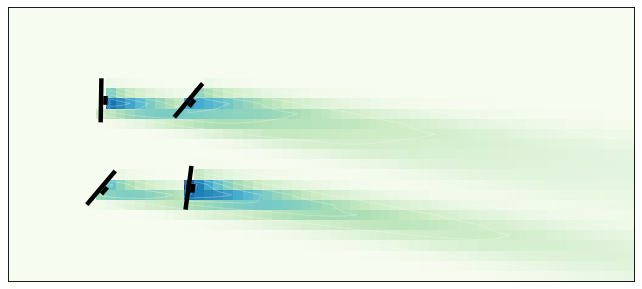

In [5]:
# Render privileged PPO 4wt symmetric (once)
env = get_4wt_symmetric_env(episode_length=EPISODE_LEN)
model = PPO.load(f"ppo_4wt_symmetric_privileged_t{TRAINING_STEPS}")
obs, info = env.reset()
done = False
total_reward = 0
for j in range(EPISODE_LEN):
    env.render()
    action, _states = model.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    if terminated or truncated:
        break
print("Total reward 4wt symmetric: ", total_reward)

In [3]:
# Compute the rewards for the unprivileged PPO 4wt symmetric
env = get_4wt_symmetric_env(episode_length=EPISODE_LEN, privileged=False, sorted_wind=True, wind_speed=8)
model = PPO.load(f"ppo_4wt_symmetric_unprivileged_t{TRAINING_STEPS}")
obs, info = env.reset()
print(obs)
done = False

degree_step = 5
evaluations = 360 // degree_step
total_rewards = np.zeros((evaluations, EPISODE_LEN))
total_powers = np.zeros((evaluations, EPISODE_LEN))
_, info = env.reset()
for i in range(evaluations):
    for j in range(EPISODE_LEN):
        action, _states = model.predict(obs)
        if i == 0 and j < 5:
            #env.render()
            print(obs, len(obs))
        obs, reward, terminated, truncated, info = env.step(action)
        total_rewards[i, j] = reward
        total_powers[i, j] = info["power_output"]
        if terminated or truncated:
            break
    for _ in range(degree_step):
        obs, info = env.reset()
# Save the rewards
np.save(f"data/ppo_4wt_symmetric_unprivileged_t{TRAINING_STEPS}_rewards.npy", total_rewards)
np.save(f"data/ppo_4wt_symmetric_unprivileged_t{TRAINING_STEPS}_powers.npy", total_powers)

Run count: 1
Wind speed: 8
Wind direction: 0
[0.5, 0.5, 0.5, 0.5]
Run count: 2
Wind speed: 8
Wind direction: 1
[0.5, 0.5, 0.5, 0.5] 4


/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:209: RuntimeWarning: invalid value encountered in sqrt
  ln_deltaNum = (1.6 + np.sqrt(M0)) * (
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:210: RuntimeWarning: invalid value encountered in sqrt
  1.6 * np.sqrt(sigma_y * sigma_z / (sigma_y0 * sigma_z0)) - np.sqrt(M0)
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:212: RuntimeWarning: invalid value encountered in sqrt
  ln_deltaDen = (1.6 - np.sqrt(M0)) * (
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:213: RuntimeWarning: invalid value encountered in sqrt
  1.6 * np.sqrt(sigma_y * sigma_z / (sigma_y0 * sigma_z0)) + np.sqrt(M0)
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:219: Runt

[0.7555555555555555, 0.7521932813856337, 0.75, 0.7555555555555555] 4
[0.7527777777777778, 0.7494155036078559, 0.7472222222222222, 0.7527777777777778] 4
[0.75, 0.7466377258300781, 0.7444444444444445, 0.75] 4
[0.7472222222222222, 0.7438599480523004, 0.7416666666666667, 0.7472222222222222] 4
Run count: 3
Wind speed: 8
Wind direction: 2
Run count: 4
Wind speed: 8
Wind direction: 3
Run count: 5
Wind speed: 8
Wind direction: 4
Run count: 6
Wind speed: 8
Wind direction: 5
Run count: 7
Wind speed: 8
Wind direction: 6
Run count: 8
Wind speed: 8
Wind direction: 7
Run count: 9
Wind speed: 8
Wind direction: 8
Run count: 10
Wind speed: 8
Wind direction: 9
Run count: 11
Wind speed: 8
Wind direction: 10
Run count: 12
Wind speed: 8
Wind direction: 11
Run count: 13
Wind speed: 8
Wind direction: 12
Run count: 14
Wind speed: 8
Wind direction: 13
Run count: 15
Wind speed: 8
Wind direction: 14
Run count: 16
Wind speed: 8
Wind direction: 15
Run count: 17
Wind speed: 8
Wind direction: 16
Run count: 18
Wind s

In [6]:
# Compute the rewards for the privileged PPO 4wt symmetric
env = get_4wt_symmetric_env(episode_length=EPISODE_LEN, sorted_wind=True, wind_speed=8)
model = PPO.load(f"ppo_4wt_symmetric_privileged_t{TRAINING_STEPS}")
obs, info = env.reset()
done = False

degree_step = 5
evaluations = 360 // degree_step
total_rewards = np.zeros((evaluations, EPISODE_LEN))
total_powers = np.zeros((evaluations, EPISODE_LEN))
_, info = env.reset()
for i in range(evaluations):
    for j in range(EPISODE_LEN):
        action, _states = model.predict(obs)
        obs, reward, terminated, truncated, info = env.step(action)
        total_rewards[i, j] = reward
        total_powers[i, j] = info["power_output"]
        if terminated or truncated:
            break
    for _ in range(degree_step):
        obs, info = env.reset()
# Save the rewards
np.save(f"data/ppo_4wt_symmetric_privileged_t{TRAINING_STEPS}_rewards.npy", total_rewards)
np.save(f"data/ppo_4wt_symmetric_privileged_t{TRAINING_STEPS}_powers.npy", total_powers)


Run count: 1
Wind speed: 8
Wind direction: 0
Run count: 2
Wind speed: 8
Wind direction: 1
Run count: 3
Wind speed: 8
Wind direction: 2
Run count: 4
Wind speed: 8
Wind direction: 3
Run count: 5
Wind speed: 8
Wind direction: 4
Run count: 6
Wind speed: 8
Wind direction: 5
Run count: 7
Wind speed: 8
Wind direction: 6
Run count: 8
Wind speed: 8
Wind direction: 7
Run count: 9
Wind speed: 8
Wind direction: 8
Run count: 10
Wind speed: 8
Wind direction: 9
Run count: 11
Wind speed: 8
Wind direction: 10
Run count: 12
Wind speed: 8
Wind direction: 11
Run count: 13
Wind speed: 8
Wind direction: 12
Run count: 14
Wind speed: 8
Wind direction: 13
Run count: 15
Wind speed: 8
Wind direction: 14
Run count: 16
Wind speed: 8
Wind direction: 15
Run count: 17
Wind speed: 8
Wind direction: 16
Run count: 18
Wind speed: 8
Wind direction: 17
Run count: 19
Wind speed: 8
Wind direction: 18
Run count: 20
Wind speed: 8
Wind direction: 19
Run count: 21
Wind speed: 8
Wind direction: 20
Run count: 22
Wind speed: 8
Wind

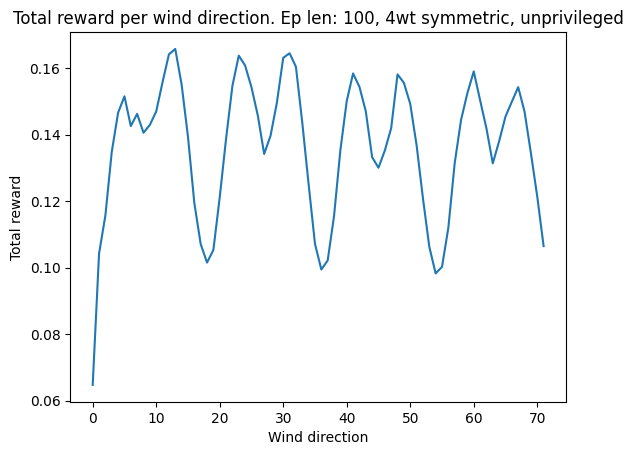

72


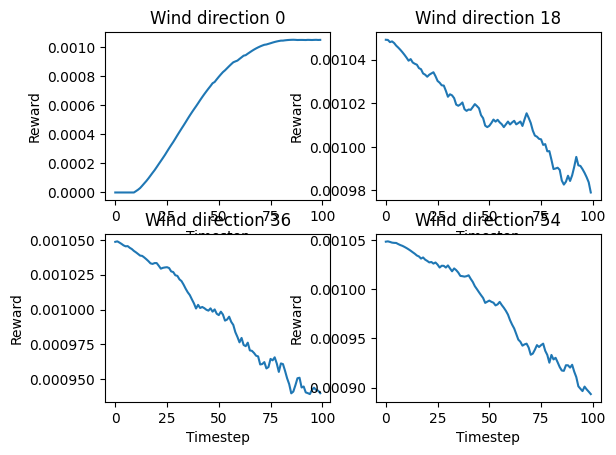

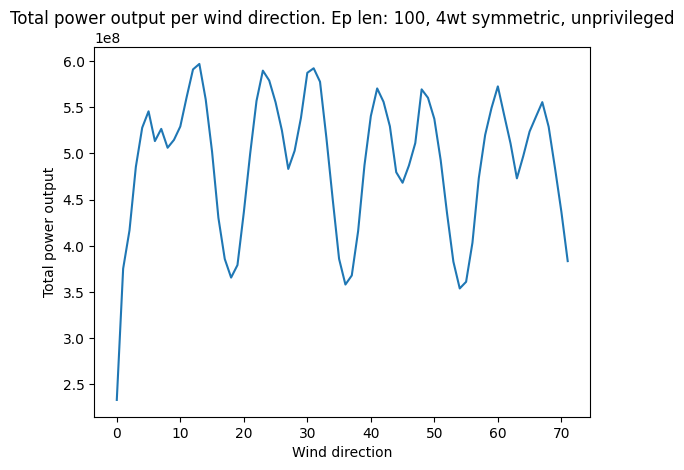

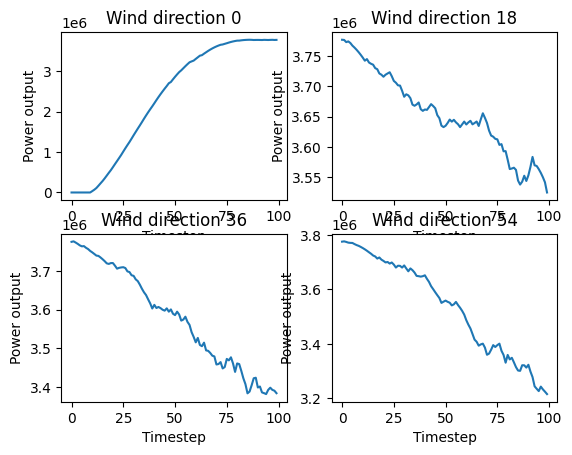

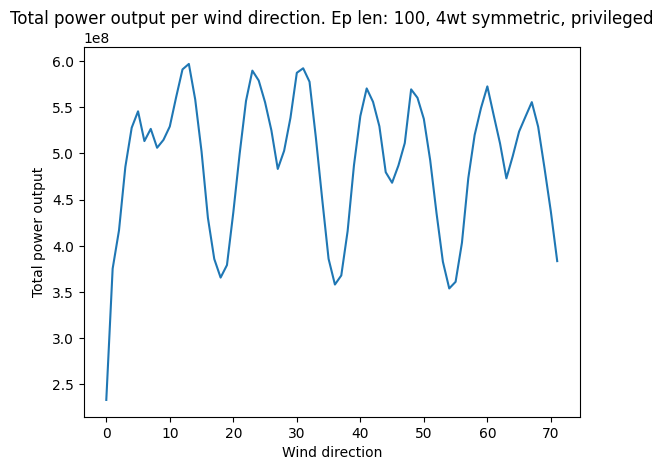

In [7]:
# Plot the rewards
plt.plot(total_rewards.sum(axis=1))
plt.xlabel("Wind direction")
plt.ylabel("Total reward")
plt.title(f"Total reward per wind direction. Ep len: {EPISODE_LEN}, 4wt symmetric, unprivileged")
plt.savefig("figures/total_reward_4wt_symmetric_unprivileged.png")
plt.show()

print(evaluations)
# Plot the rewards in 4 directions with subplots
fig, axs = plt.subplots(2, 2)
for i in range(4):
    quarter_length = total_rewards.shape[0] / 4
    axs[i//2, i%2].plot(total_rewards[int(i * quarter_length)])
    axs[i//2, i%2].set_title(f"Wind direction {int(i * quarter_length)}")
    axs[i//2, i%2].set_xlabel("Timestep")
    axs[i//2, i%2].set_ylabel("Reward")
plt.savefig("figures/total_reward_4wt_symmetric_unprivileged_subplots.png")
plt.show()

# Plot the power output
plt.plot(total_powers.sum(axis=1))
plt.xlabel("Wind direction")
plt.ylabel("Total power output")
plt.title(f"Total power output per wind direction. Ep len: {EPISODE_LEN}, 4wt symmetric, unprivileged")

plt.savefig("figures/total_power_4wt_symmetric_unprivileged.png")
plt.show()

# Plot the power output in 4 directions with subplots
fig, axs = plt.subplots(2, 2)
for i in range(4):
    quarter_length = total_powers.shape[0] / 4
    axs[i//2, i%2].plot(total_powers[int(i * quarter_length)])
    axs[i//2, i%2].set_title(f"Wind direction {int(i * quarter_length)}")
    axs[i//2, i%2].set_xlabel("Timestep")
    axs[i//2, i%2].set_ylabel("Power output")
plt.savefig("figures/total_power_4wt_symmetric_unprivileged_subplots.png")
plt.show()

# plot power output for ppo privileged
total_powers = np.load(f"data/ppo_4wt_symmetric_privileged_t{TRAINING_STEPS}_powers.npy")
plt.plot(total_powers.sum(axis=1))
plt.xlabel("Wind direction")
plt.ylabel("Total power output")
plt.title(f"Total power output per wind direction. Ep len: {EPISODE_LEN}, 4wt symmetric, privileged")
plt.savefig("figures/total_power_4wt_symmetric_privileged.png")
plt.show()


[ 0.  3.  6.  9. 12.]


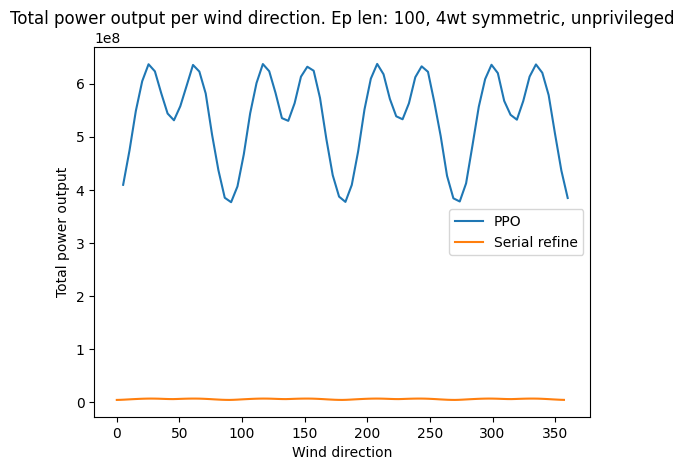

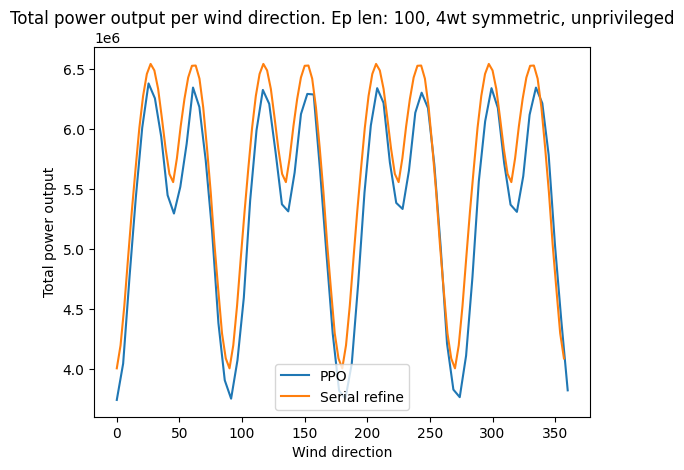

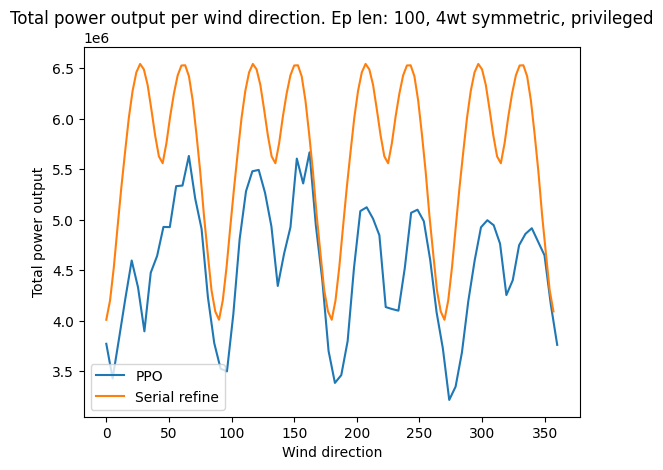

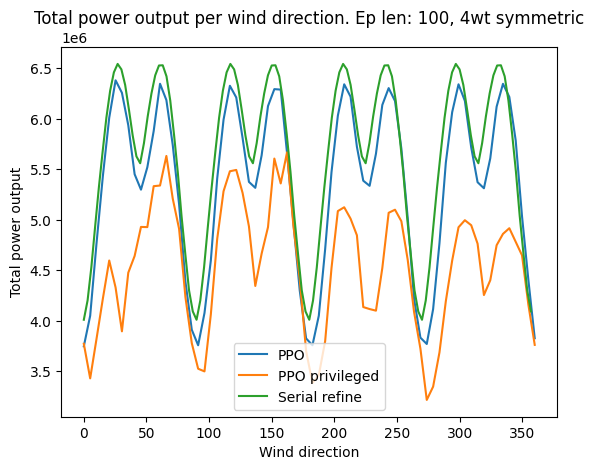

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# load ppo rewards
total_rewards = np.load("data/ppo_4wt_symmetric_unprivileged_t1000000.0_rewards.npy")

sr_wind_dir = np.load("data/serial_refine/wind_direction.npy")
sr_power = np.load("data/serial_refine/farm_power_opt.npy")
print(sr_wind_dir[:5])

# Compare PPO reward and sr
# plt.plot(np.linspace(0, 360, 360//5), total_rewards.sum(axis=1)* 1e7*3.7, label="PPO")
# plt.plot(sr_wind_dir, sr_power, label="Serial refine")
# plt.xlabel("Wind direction")
# plt.ylabel("Total reward")
# plt.title(f"Total reward per wind direction. Ep len: {100}, 4wt symmetric, unprivileged")
# plt.legend()
# plt.savefig("figures/total_reward_4wt_symmetric_unprivileged_vs_sr.png")
# plt.show()

# PPO power output vs sr power output
ppo_power = np.load("data/ppo_4wt_symmetric_unprivileged_t1000000.0_powers.npy")
plt.plot(np.linspace(0, 360, 360//5), ppo_power.sum(axis=1), label="PPO")
plt.plot(sr_wind_dir, sr_power, label="Serial refine")
plt.xlabel("Wind direction")
plt.ylabel("Total power output")
plt.title(f"Total power output per wind direction. Ep len: {100}, 4wt symmetric, unprivileged")
plt.legend()
plt.savefig("figures/total_power_4wt_symmetric_unprivileged_vs_sr.png")
plt.show()

ppo_power = np.load("data/ppo_4wt_symmetric_unprivileged_t1000000.0_powers.npy")
plt.plot(np.linspace(0, 360, 360//5), ppo_power[:, -1], label="PPO")
plt.plot(sr_wind_dir, sr_power, label="Serial refine")
plt.xlabel("Wind direction")
plt.ylabel("Total power output")
plt.title(f"Total power output per wind direction. Ep len: {100}, 4wt symmetric, unprivileged")
plt.legend()
plt.savefig("figures/total_power_4wt_symmetric_unprivileged_vs_sr.png")
plt.show()

### Privileged PPO
# power output last step
ppo_power = np.load("data/ppo_4wt_symmetric_privileged_t1000000.0_powers.npy")
plt.plot(np.linspace(0, 360, 360//5), ppo_power[:, -1], label="PPO")
plt.plot(sr_wind_dir, sr_power, label="Serial refine")
plt.xlabel("Wind direction")
plt.ylabel("Total power output")
plt.title(f"Total power output per wind direction. Ep len: {100}, 4wt symmetric, privileged")
plt.legend()
plt.savefig("figures/total_power_4wt_symmetric_privileged_vs_sr.png")
plt.show()

# Compare PPO, privileged PPO, and sr
# PPO uses only last step
ppo_power = np.load("data/ppo_4wt_symmetric_unprivileged_t1000000.0_powers.npy")
ppo_power_privileged = np.load("data/ppo_4wt_symmetric_privileged_t1000000.0_powers.npy")
plt.plot(np.linspace(0, 360, 360//5), ppo_power[:, -1], label="PPO")
plt.plot(np.linspace(0, 360, 360//5), ppo_power_privileged[:, -1], label="PPO privileged")
plt.plot(sr_wind_dir, sr_power, label="Serial refine")
plt.xlabel("Wind direction")
plt.ylabel("Total power output")
plt.title(f"Total power output per wind direction. Ep len: {100}, 4wt symmetric")
plt.legend()
plt.savefig("figures/total_power_4wt_symmetric_vs_sr.png")
plt.show()

In [17]:
def compute_rewards_and_power(model, env, evaluations):
    total_rewards = np.zeros((evaluations, EPISODE_LEN))
    total_powers = np.zeros((evaluations, EPISODE_LEN))
    obs, info = env.reset()
    print(len(obs))
    print(info)
    for i in range(evaluations):
        for j in range(EPISODE_LEN):
            action, _states = model.predict(obs)
            obs, reward, terminated, truncated, info = env.step(action)
            total_rewards[i, j] = reward
            total_powers[i, j] = info["power_output"]
            if terminated or truncated:
                break
        for _ in range(degree_step):
            obs, info = env.reset()
    return total_rewards, total_powers

# compute rewards and powers for all the models
models_to_evaluate = [
    #("ppo_4wt_symmetric_privileged_t1000000", 50),	
    ("ppo_4wt_symmetric_privileged_t1000000.0_mast75", 75),
    ("ppo_4wt_symmetric_privileged_t1000000.0_mast100", 100),
    #("ppo_4wt_symmetric_unprivileged_t1000000", 50),
]

for model_name, mast_distancing in models_to_evaluate:
    model = PPO.load(f"{model_name}")
    env = get_4wt_symmetric_env(
        episode_length=EPISODE_LEN, 
        privileged="unprivileged" not in model_name, 
        sorted_wind=True, wind_speed=8,
        mast_distancing=mast_distancing,
    )
    rewards, powers = compute_rewards_and_power(model, env, evaluations)
    np.save(f"data/{model_name}_rewards.npy", rewards)
    np.save(f"data/{model_name}_powers.npy", powers)

Making env with n masts: 9
Run count: 1
Wind speed: 8
Wind direction: 0
22
None


/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:209: RuntimeWarning: invalid value encountered in sqrt
  ln_deltaNum = (1.6 + np.sqrt(M0)) * (
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:210: RuntimeWarning: invalid value encountered in sqrt
  1.6 * np.sqrt(sigma_y * sigma_z / (sigma_y0 * sigma_z0)) - np.sqrt(M0)
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:212: RuntimeWarning: invalid value encountered in sqrt
  ln_deltaDen = (1.6 - np.sqrt(M0)) * (
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:213: RuntimeWarning: invalid value encountered in sqrt
  1.6 * np.sqrt(sigma_y * sigma_z / (sigma_y0 * sigma_z0)) + np.sqrt(M0)
/home/maranc/miniconda3/envs/windfarm/lib/python3.8/site-packages/floris/simulation/wake_deflection/gauss.py:219: Runt

Run count: 2
Wind speed: 8
Wind direction: 1
Run count: 3
Wind speed: 8
Wind direction: 2
Run count: 4
Wind speed: 8
Wind direction: 3
Run count: 5
Wind speed: 8
Wind direction: 4
Run count: 6
Wind speed: 8
Wind direction: 5
Run count: 7
Wind speed: 8
Wind direction: 6
Run count: 8
Wind speed: 8
Wind direction: 7
Run count: 9
Wind speed: 8
Wind direction: 8
Run count: 10
Wind speed: 8
Wind direction: 9
Run count: 11
Wind speed: 8
Wind direction: 10
Run count: 12
Wind speed: 8
Wind direction: 11
Run count: 13
Wind speed: 8
Wind direction: 12
Run count: 14
Wind speed: 8
Wind direction: 13
Run count: 15
Wind speed: 8
Wind direction: 14
Run count: 16
Wind speed: 8
Wind direction: 15
Run count: 17
Wind speed: 8
Wind direction: 16
Run count: 18
Wind speed: 8
Wind direction: 17
Run count: 19
Wind speed: 8
Wind direction: 18
Run count: 20
Wind speed: 8
Wind direction: 19
Run count: 21
Wind speed: 8
Wind direction: 20
Run count: 22
Wind speed: 8
Wind direction: 21
Run count: 23
Wind speed: 8
Wi

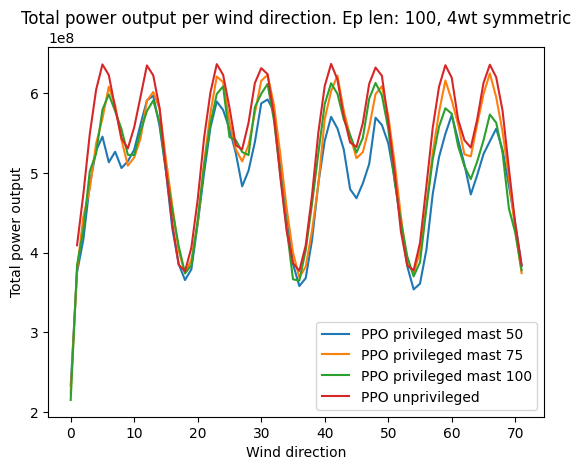

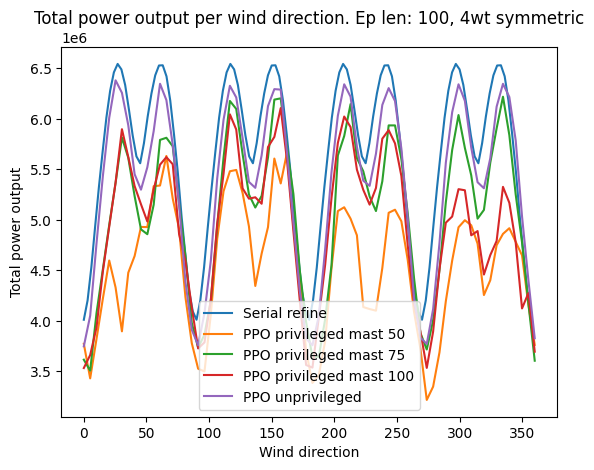

In [21]:
# compare total power output for all models
models_to_compare = [
    "ppo_4wt_symmetric_privileged_t1000000.0",
    "ppo_4wt_symmetric_privileged_t1000000.0_mast75",
    "ppo_4wt_symmetric_privileged_t1000000.0_mast100",
    "ppo_4wt_symmetric_unprivileged_t1000000.0",
]
label_names = [
    "PPO privileged mast 50",
    "PPO privileged mast 75",
    "PPO privileged mast 100",
    "PPO unprivileged",
]
for i, model_name in enumerate(models_to_compare):
    total_powers = np.load(f"data/{model_name}_powers.npy")
    plt.plot(total_powers.sum(axis=1), label=label_names[i])
plt.xlabel("Wind direction")
plt.ylabel("Total power output")
plt.title(f"Total power output per wind direction. Ep len: {EPISODE_LEN}, 4wt symmetric")
plt.legend()
plt.savefig("figures/total_power_4wt_symmetric_all.png")
plt.show()

# compare final power output of all models to sr
sr_power = np.load("data/serial_refine/farm_power_opt.npy")
sr_wind_dir = np.load("data/serial_refine/wind_direction.npy")
plt.plot(sr_wind_dir, sr_power, label="Serial refine")

for i, model_name in enumerate(models_to_compare):
    total_powers = np.load(f"data/{model_name}_powers.npy")
    plt.plot(np.linspace(0, 360, 360//5), total_powers[:, -1], label=label_names[i])
plt.xlabel("Wind direction")
plt.ylabel("Total power output")
plt.title(f"Total power output per wind direction. Ep len: {EPISODE_LEN}, 4wt symmetric")
plt.legend()
plt.savefig("figures/total_power_4wt_symmetric_all_vs_sr.png")
plt.show()


# SR Agent

[  0.           3.02521008   6.05042017   9.07563025  12.10084034
  15.12605042  18.1512605   21.17647059  24.20168067  27.22689076
  30.25210084  33.27731092  36.30252101  39.32773109  42.35294118
  45.37815126  48.40336134  51.42857143  54.45378151  57.4789916
  60.50420168  63.52941176  66.55462185  69.57983193  72.60504202
  75.6302521   78.65546218  81.68067227  84.70588235  87.73109244
  90.75630252  93.78151261  96.80672269  99.83193277 102.85714286
 105.88235294 108.90756303 111.93277311 114.95798319 117.98319328
 121.00840336 124.03361345 127.05882353 130.08403361 133.1092437
 136.13445378 139.15966387 142.18487395 145.21008403 148.23529412
 151.2605042  154.28571429 157.31092437 160.33613445 163.36134454
 166.38655462 169.41176471 172.43697479 175.46218487 178.48739496
 181.51260504 184.53781513 187.56302521 190.58823529 193.61344538
 196.63865546 199.66386555 202.68907563 205.71428571 208.7394958
 211.76470588 214.78991597 217.81512605 220.84033613 223.86554622
 226.8907563 

KeyboardInterrupt: 

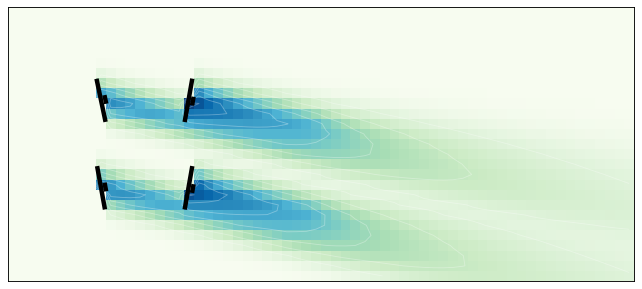

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from env_utils import get_4wt_symmetric_env

EPISODE_LEN = 100


class SR_ProportionalController:
    def __init__(self, wind_directions, optimal_yaws):
        self.wind_directions = wind_directions
        self.optimal_yaws = optimal_yaws

    def predict(self, wind_direction, current_yaws):
        # Find the closest wind direction and aim for the optimal yaw
        # TODO: interpolate between the two closest wind directions
        # TODO: Distance should take into account the periodicity of the wind direction
        closest_idx = np.argmin(np.abs(self.wind_directions - wind_direction))
        target_yaw = self.optimal_yaws[closest_idx]
        
        yaw_diff = target_yaw - current_yaws
        print(target_yaw, current_yaws, yaw_diff)
        action = yaw_diff * 0.5
        return action

    
optimal_yaws = np.load("data/serial_refine/yaw_angles_opt_sr.npy")
wind_directions = np.linspace(0, 360, 120)
print(wind_directions)
agent = SR_ProportionalController(wind_directions, optimal_yaws)

# Render proportional controller agent
env = get_4wt_symmetric_env(episode_length=EPISODE_LEN, privileged=False, wind_speed=8, 
                            changing_wind=False,
                            action_representation="yaw")
obs, info = env.reset()
print(obs)
done = False

_, info = env.reset()
env.wind_process.wind_direction = 280

# Initialize wandb
config = {
    "experiment_name": "proportional_controller_SR_4wt_symmetric_unprivileged_fixed_wind",
    "agent": "proportional_controller_SR",
    "env": "4wt_symmetric",
    "privileged": False,
    "changing_wind": False,
}
run = wandb.init(
    project="thesis_tests",
    config=config,
    sync_tensorboard=True,  # auto-upload sb3's tensorboard metrics
    monitor_gym=True,  # auto-upload the videos of agents playing the game
    save_code=False,  # optional
    name="proportional_controller_SR_4wt_symmetric_unprivileged_fixed_wind",
)

for i in range(EPISODE_LEN):
    wind_direction = env.wind_process.wind_direction
    current_yaws = env.yaws_from_wind

    action = agent.predict(wind_direction, current_yaws)
    obs, reward, terminated, truncated, info = env.step(action)

    # Log rewards
    wandb.log({"reward": reward, "power_output": info["power_output"]})

    env.render()
    if terminated or truncated:
        break

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: maranc. Use `wandb login --relogin` to force relogin


[  0.           3.02521008   6.05042017   9.07563025  12.10084034
  15.12605042  18.1512605   21.17647059  24.20168067  27.22689076
  30.25210084  33.27731092  36.30252101  39.32773109  42.35294118
  45.37815126  48.40336134  51.42857143  54.45378151  57.4789916
  60.50420168  63.52941176  66.55462185  69.57983193  72.60504202
  75.6302521   78.65546218  81.68067227  84.70588235  87.73109244
  90.75630252  93.78151261  96.80672269  99.83193277 102.85714286
 105.88235294 108.90756303 111.93277311 114.95798319 117.98319328
 121.00840336 124.03361345 127.05882353 130.08403361 133.1092437
 136.13445378 139.15966387 142.18487395 145.21008403 148.23529412
 151.2605042  154.28571429 157.31092437 160.33613445 163.36134454
 166.38655462 169.41176471 172.43697479 175.46218487 178.48739496
 181.51260504 184.53781513 187.56302521 190.58823529 193.61344538
 196.63865546 199.66386555 202.68907563 205.71428571 208.7394958
 211.76470588 214.78991597 217.81512605 220.84033613 223.86554622
 226.8907563 

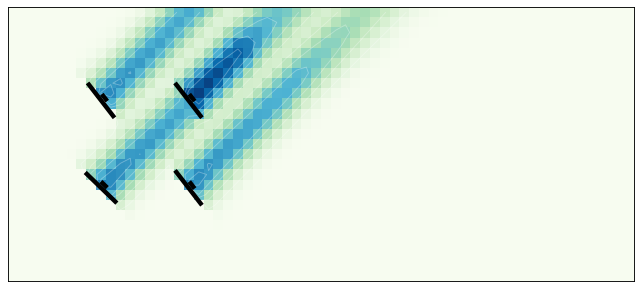

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from env_utils import get_4wt_symmetric_env

EPISODE_LEN = 100


class SR_ProportionalController:
    def __init__(self, wind_directions, optimal_yaws):
        self.wind_directions = wind_directions
        self.optimal_yaws = optimal_yaws

    def predict(self, wind_direction, current_yaws):
        # Find the closest wind direction and aim for the optimal yaw
        # TODO: interpolate between the two closest wind directions
        # TODO: Distance should take into account the periodicity of the wind direction
        closest_idx = np.argmin(np.abs(self.wind_directions - wind_direction))
        target_yaw = self.optimal_yaws[closest_idx]
        
        yaw_diff = target_yaw - current_yaws
        print(target_yaw, current_yaws, yaw_diff)
        action = yaw_diff * 0.5
        return action


# Initialize wandb
config = {
    "experiment_name": "proportional_controller_SR_4wt_symmetric_unprivileged_fixed_wind",
    "agent": "proportional_controller_SR",
    "env": "4wt_symmetric",
    "privileged": False,
    "changing_wind": False,
}
run = wandb.init(
    project="thesis_tests",
    config=config,
    sync_tensorboard=True,  # auto-upload sb3's tensorboard metrics
    monitor_gym=True,  # auto-upload the videos of agents playing the game
    save_code=False,  # optional
    name="proportional_controller_SR_4wt_symmetric_unprivileged_fixed_wind",
)

optimal_yaws = np.load("data/serial_refine/yaw_angles_opt_sr.npy")
wind_directions = np.linspace(0, 360, 120)
print(wind_directions)
agent = SR_ProportionalController(wind_directions, optimal_yaws)

# Render proportional controller agent
env = get_4wt_symmetric_env(episode_length=EPISODE_LEN, privileged=False, wind_speed=8, 
                            changing_wind=True,
                            action_representation="yaw")
obs, info = env.reset()
print(obs)
done = False

_, info = env.reset()
env.wind_process.wind_direction = 270

for i in range(EPISODE_LEN):
    wind_direction = env.wind_process.wind_direction
    current_yaws = env.yaws_from_wind

    action = agent.predict(wind_direction, current_yaws)
    obs, reward, terminated, truncated, info = env.step(action)

    wandb.log({"reward": reward, "power_output": info["power_output"]})

    env.render()
    if terminated or truncated:
        break

wandb.finish()

[  0.           3.02521008   6.05042017   9.07563025  12.10084034
  15.12605042  18.1512605   21.17647059  24.20168067  27.22689076
  30.25210084  33.27731092  36.30252101  39.32773109  42.35294118
  45.37815126  48.40336134  51.42857143  54.45378151  57.4789916
  60.50420168  63.52941176  66.55462185  69.57983193  72.60504202
  75.6302521   78.65546218  81.68067227  84.70588235  87.73109244
  90.75630252  93.78151261  96.80672269  99.83193277 102.85714286
 105.88235294 108.90756303 111.93277311 114.95798319 117.98319328
 121.00840336 124.03361345 127.05882353 130.08403361 133.1092437
 136.13445378 139.15966387 142.18487395 145.21008403 148.23529412
 151.2605042  154.28571429 157.31092437 160.33613445 163.36134454
 166.38655462 169.41176471 172.43697479 175.46218487 178.48739496
 181.51260504 184.53781513 187.56302521 190.58823529 193.61344538
 196.63865546 199.66386555 202.68907563 205.71428571 208.7394958
 211.76470588 214.78991597 217.81512605 220.84033613 223.86554622
 226.8907563 

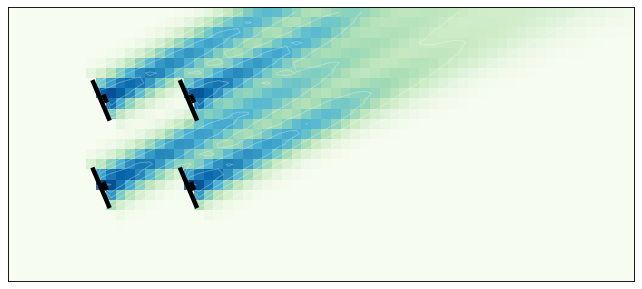

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from env_utils import get_4wt_symmetric_env

EPISODE_LEN = 100


class SR_ProportionalController:
    def __init__(self, wind_directions, optimal_yaws):
        self.wind_directions = wind_directions
        self.optimal_yaws = optimal_yaws

    def predict(self, wind_direction, current_yaws):
        # Find the closest wind direction and aim for the optimal yaw
        # TODO: interpolate between the two closest wind directions
        # TODO: Distance should take into account the periodicity of the wind direction
        closest_idx = np.argmin(np.abs(self.wind_directions - wind_direction))
        target_yaw = self.optimal_yaws[closest_idx]
        
        yaw_diff = target_yaw - current_yaws
        print(target_yaw, current_yaws, yaw_diff)
        action = yaw_diff * 0.5
        return action


# Initialize wandb
config = {
    "experiment_name": "proportional_controller_SR_4wt_symmetric_unprivileged_changing_wind",
    "agent": "proportional_controller_SR",
    "env": "4wt_symmetric",
    "privileged": False,
    "changing_wind": False,
}
run = wandb.init(
    project="thesis_tests",
    config=config,
    sync_tensorboard=True,  # auto-upload sb3's tensorboard metrics
    monitor_gym=True,  # auto-upload the videos of agents playing the game
    save_code=False,  # optional
    name="proportional_controller_SR_4wt_symmetric_unprivileged_changing_wind",
)

optimal_yaws = np.load("data/serial_refine/yaw_angles_opt_sr.npy")
wind_directions = np.linspace(0, 360, 120)
print(wind_directions)
agent = SR_ProportionalController(wind_directions, optimal_yaws)

# Render proportional controller agent
env = get_4wt_symmetric_env(episode_length=EPISODE_LEN, privileged=False, wind_speed=8, 
                            changing_wind=True,
                            action_representation="yaw")
obs, info = env.reset()
print(obs)
done = False

repetitions = 10
total_rewards = np.zeros((repetitions, EPISODE_LEN))
total_powers = np.zeros((repetitions, EPISODE_LEN))
video = []
for i in range(repetitions):
    
    _, info = env.reset()
    env.wind_process.wind_direction = 280
    env.wind_process.wind_speed = 8.0

    for j in range(EPISODE_LEN):
        wind_direction = env.wind_process.wind_direction
        current_yaws = env.yaws_from_wind

        action = agent.predict(wind_direction, current_yaws)
        obs, reward, terminated, truncated, info = env.step(action)

        total_rewards[i, j] = reward
        total_powers[i, j] = info["power_output"]
        wandb.log({"reward": reward, "power_output": info["power_output"]})

        if i == 0:
            video.append(env.render(mode="rgb_array"))

        if terminated or truncated:
            break

total_rewards = total_rewards.sum(axis=1)
total_powers = total_powers.sum(axis=1)
wandb.log({
    "eval/video": wandb.Video(np.array(video).transpose((0,3,1,2)), fps=30),
    "eval/total_reward": total_rewards.mean(),
    "eval/total_reward_std": total_rewards.std(),
    "eval/total_reward_max": total_rewards.max(),
    "eval/total_reward_min": total_rewards.min(),
    "eval/total_power": total_powers.mean(),
    "eval/total_power_std": total_powers.std(),
    "eval/total_power_max": total_powers.max(),
    "eval/total_power_min": total_powers.min(),
})

wandb.finish()